# Look at the distribution of missingness

In [37]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory
from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER

# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/combined_testis_force')

last updated: 2018-05-04 
Git hash: 59ecd424780ee0f4946fac686cdb2769e214a832


In [348]:
norm = nbconfig.seurat.get_normalized_read_counts()

In [380]:
clusters = nbconfig.seurat.get_clusters()['res.0.4']
clusters.name = 'cluster'
clusters = clusters.map(CLUSTER_ANNOT)
cluster_cnts = clusters.value_counts()

In [381]:
zeros = (norm.T == 0).join(clusters)
zeros['rep'] = zeros.index.map(lambda x: x.split('_')[0])
zero_counts = zeros.groupby(['cluster', 'rep']).sum()
pct_zero = zero_counts.div(cluster_cnts, axis='index', level=0).mul(100)

In [382]:
pct_zero.head()

FBgn0031081  FBgn0031085  FBgn0040784  \
cluster                         rep                                           
Early Primary Spermatocytes (8) rep1    11.475410     5.464481     2.185792   
                                rep2    41.803279     9.289617     0.819672   
                                rep3    45.355191    10.655738     1.912568   
Early Somatic Cyst Cells (1)    rep1    28.836545    28.551035    28.408280   
                                rep2    35.474661    25.981442    31.263383   

                                      FBgn0031086  FBgn0031082  FBgn0031080  \
cluster                         rep                                           
Early Primary Spermatocytes (8) rep1    11.748634     8.743169    11.475410   
                                rep2    42.349727    22.677596    42.349727   
                                rep3    45.901639    25.136612    45.901639   
Early Somatic Cyst Cells (1)    rep1    29.122056    28.979300    26.909350   
                                rep2    35.760171    33.190578    35.331906   

                                      FBgn0053217  FBgn0052350  FBgn0024733  \
cluster                         rep                                           
Early Primary Spermatocytes (8) rep1     5.737705     9.836066     1.366120   
                                rep2    16.939891    35.792350     0.000000   
                                rep3    19.398907    38.524590     0.000000   
Early Somatic Cyst Cells (1)    rep1    25.553176    27.765882     1.284797   
                                rep2    31.192006    34.475375     0.000000   

                                      FBgn0040372     ...       FBgn0045498  \
cluster                         rep                   ...                     
Early Primary Spermatocytes (8) rep1     6.830601     ...         11.748634   
                                rep2    12.568306     ...         42.076503   
                                rep3    15.027322     ...         45.628415   
Early Somatic Cyst Cells (1)    rep1    26.481085     ...         29.122056   
                                rep2    31.334761     ...         35.760171   

                                      FBgn0001174  FBgn0053128  FBgn0051926  \
cluster                         rep                                           
Early Primary Spermatocytes (8) rep1    11.748634    11.748634    11.748634   
                                rep2    42.349727    42.349727    41.530055   
                                rep3    45.901639    45.901639    45.081967   
Early Somatic Cyst Cells (1)    rep1    29.122056    29.122056    29.122056   
                                rep2    35.760171    35.760171    35.688794   

                                      FBgn0051661  FBgn0028481  FBgn0031306  \
cluster                         rep                                           
Early Primary Spermatocytes (8) rep1    11.748634    11.748634    11.748634   
                                rep2    42.349727    42.349727    42.349727   
                                rep3    45.901639    45.901639    45.901639   
Early Somatic Cyst Cells (1)    rep1    29.122056    29.122056    29.122056   
                                rep2    35.760171    35.760171    35.760171   

                                      FBgn0031305  FBgn0031276  FBgn0040725  
cluster                         rep                                          
Early Primary Spermatocytes (8) rep1    11.748634    11.748634    11.748634  
                                rep2    42.349727    42.349727    42.349727  
                                rep3    45.901639    45.901639    45.901639  
Early Somatic Cyst Cells (1)    rep1    29.122056    29.122056    29.122056  
                                rep2    35.688794    35.688794    35.760171  

[5 rows x 14312 columns]

In [383]:
dat = pct_zero.reset_index()
dat.head()

,cluster,rep,FBgn0031081,FBgn0031085,FBgn0040784,FBgn0031086,FBgn0031082,FBgn0031080,FBgn0053217,FBgn0052350,...,FBgn0045498,FBgn0001174,FBgn0053128,FBgn0051926,FBgn0051661,FBgn0028481,FBgn0031306,FBgn0031305,FBgn0031276,FBgn0040725
0,Early Primary Spermatocytes (8),rep1,11.475410,5.464481,2.185792,11.748634,8.743169,11.475410,5.737705,9.836066,...,11.748634,11.748634,11.748634,11.748634,11.748634,11.748634,11.748634,11.748634,11.748634,11.748634
1,Early Primary Spermatocytes (8),rep2,41.803279,9.289617,0.819672,42.349727,22.677596,42.349727,16.939891,35.792350,...,42.076503,42.349727,42.349727,41.530055,42.349727,42.349727,42.349727,42.349727,42.349727,42.349727
2,Early Primary Spermatocytes (8),rep3,45.355191,10.655738,1.912568,45.901639,25.136612,45.901639,19.398907,38.524590,...,45.628415,45.901639,45.901639,45.081967,45.901639,45.901639,45.901639,45.901639,45.901639,45.901639
3,Early Somatic Cyst Cells (1),rep1,28.836545,28.551035,28.408280,29.122056,28.979300,26.909350,25.553176,27.765882,...,29.122056,29.122056,29.122056,29.122056,29.122056,29.122056,29.122056,29.122056,29.122056,29.122056
4,Early Somatic Cyst Cells (1),rep2,35.474661,25.981442,31.263383,35.760171,33.190578,35.331906,31.192006,34.475375,...,35.760171,35.760171,35.760171,35.688794,35.760171,35.760171,35.760171,35.688794,35.688794,35.760171


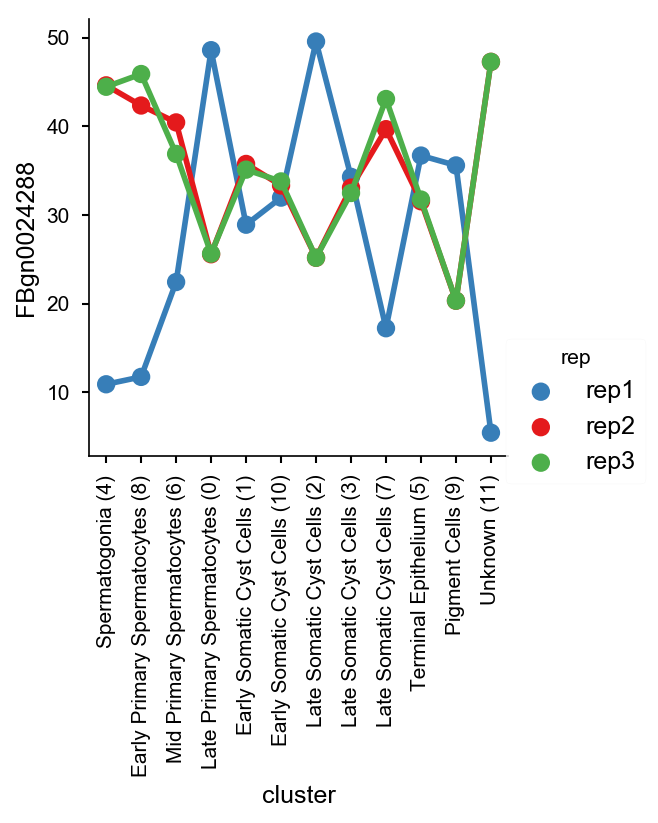

In [393]:
ax = sns.factorplot("cluster", nbconfig.symbol2fbgn['Sox100B'], data=dat, hue='rep', rotation=90, order=CLUSTER_ORDER)
for l in ax.ax.get_xticklabels():
    l.set_rotation(90)